Импорт базы данных

In [47]:
import time
import datetime
import pandas as pd
import matplotlib.pyplot as plt

In [48]:
ticker = 'AAPL'
period1 = int(time.mktime(datetime.datetime(2020, 12, 1, 23, 59).timetuple()))
period2 = int(time.mktime(datetime.datetime(2022, 12, 31, 23, 59).timetuple()))
interval = '1d' # 1d, 1m

query_string = f'https://query1.finance.yahoo.com/v7/finance/download/{ticker}?period1={period1}&period2={period2}&interval={interval}&events=history&includeAdjustedClose=true'

df = pd.read_csv(query_string)
# print(df)
df.to_csv('AAPL.csv')

In [49]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-12-01,121.010002,123.470001,120.010002,122.720001,121.634186,127728200
1,2020-12-02,122.019997,123.370003,120.889999,123.080002,121.990997,89004200
2,2020-12-03,123.519997,123.779999,122.209999,122.940002,121.852242,78967600
3,2020-12-04,122.599998,122.860001,121.519997,122.250000,121.168343,78260400
4,2020-12-07,122.309998,124.570000,122.250000,123.750000,122.655075,86712000


In [50]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,366.000000,366.000000,366.000000,366.000000,366.000000,3.660000e+02
mean,146.468416,148.132569,144.835191,146.532817,145.869053,9.277107e+07
std,17.497190,17.804016,17.237198,17.532519,17.765474,2.832175e+07
min,119.029999,120.400002,116.209999,116.360001,115.502800,4.100000e+07
25%,130.732506,132.267502,129.409999,130.930000,129.813675,7.417418e+07
50%,145.875000,147.105004,145.214996,146.074997,145.462791,8.858365e+07
75%,161.119995,164.169998,158.894993,161.567497,161.125172,1.068066e+08
max,182.630005,182.940002,179.119995,182.009995,181.511703,1.954327e+08


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       366 non-null    object 
 1   Open       366 non-null    float64
 2   High       366 non-null    float64
 3   Low        366 non-null    float64
 4   Close      366 non-null    float64
 5   Adj Close  366 non-null    float64
 6   Volume     366 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 20.1+ KB


In [52]:
datelist = pd.date_range(datetime.datetime(2020, 12, 1, 23, 59), periods=366).tolist()

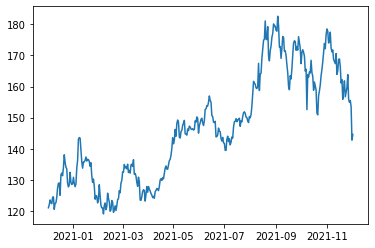

In [53]:
plt.plot(datelist, df['Open'])

https://pypi.org/project/yfinance/

In [54]:
!pip install yfinance
print('yfinance install')

yfinance installRequirement already satisfied: yfinance in c:\users\vladm\appdata\local\programs\python\python39\lib\site-packages (0.1.70)



In [55]:
import yfinance as yf

ticket = yf.Ticker("AAPL")

Информация об акции

In [56]:
# get stock info
ticket.info

{'zip': '95014',
 'sector': 'Technology',
 'fullTimeEmployees': 154000,
 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. It also sells various related services. In addition, the company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; AirPods Max, an over-ear wireless headphone; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, HomePod, and iPod touch. Further, it provides AppleCare support services; cloud services store services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and podcasts. Additionally, the company offers various services, such as Apple Arcade, a game subscription service; Apple Music, which offers users a curated listening experience wit

In [57]:
# get historical market data
hist = ticket.history(period="max")
print(hist)

                  Open        High         Low       Close     Volume  \
Date                                                                    
1980-12-12    0.100178    0.100614    0.100178    0.100178  469033600   
1980-12-15    0.095388    0.095388    0.094952    0.094952  175884800   
1980-12-16    0.088418    0.088418    0.087983    0.087983  105728000   
1980-12-17    0.090160    0.090596    0.090160    0.090160   86441600   
1980-12-18    0.092774    0.093210    0.092774    0.092774   73449600   
...                ...         ...         ...         ...        ...   
2022-05-09  154.929993  155.830002  151.490005  152.059998  131577900   
2022-05-10  155.520004  156.740005  152.929993  154.509995  115366700   
2022-05-11  153.500000  155.449997  145.809998  146.500000  142689800   
2022-05-12  142.770004  146.199997  138.800003  142.559998  182271000   
2022-05-13  144.589996  148.100006  143.110001  145.609894   76685617   

            Dividends  Stock Splits  
Date        

Поуазывает сплиты и дивиденды

In [58]:
# show actions (dividends, splits)
ticket.actions

,Dividends,Stock Splits
Date,,
1987-05-11,0.000536,0.0
1987-06-16,0.000000,2.0
1987-08-10,0.000536,0.0
1987-11-17,0.000714,0.0
1988-02-12,0.000714,0.0
...,...,...
2021-05-07,0.220000,0.0
2021-08-06,0.220000,0.0
2021-11-05,0.220000,0.0


Квартальный отчёт

In [59]:
ticket.quarterly_financials

,2022-03-26,2021-12-25,2021-09-25,2021-06-26
Research Development,6387000000.0,6306000000.0,5772000000.0,5717000000.0
Effect Of Accounting Charges,None,None,None,None
Income Before Tax,30139000000.0,41241000000.0,23248000000.0,24369000000.0
Minority Interest,None,None,None,None
Net Income,25010000000.0,34630000000.0,20551000000.0,21744000000.0
Selling General Administrative,6193000000.0,6449000000.0,5616000000.0,5412000000.0
Gross Profit,42559000000.0,54243000000.0,35174000000.0,35255000000.0
Ebit,29979000000.0,41488000000.0,23786000000.0,24126000000.0
Operating Income,29979000000.0,41488000000.0,23786000000.0,24126000000.0
Other Operating Expenses,None,None,None,None


Годовой отчёт

In [60]:
ticket.financials

,2021-09-25,2020-09-26,2019-09-28,2018-09-29
Research Development,21914000000.0,18752000000.0,16217000000.0,14236000000.0
Effect Of Accounting Charges,None,None,None,None
Income Before Tax,109207000000.0,67091000000.0,65737000000.0,72903000000.0
Minority Interest,None,None,None,None
Net Income,94680000000.0,57411000000.0,55256000000.0,59531000000.0
Selling General Administrative,21973000000.0,19916000000.0,18245000000.0,16705000000.0
Gross Profit,152836000000.0,104956000000.0,98392000000.0,101839000000.0
Ebit,108949000000.0,66288000000.0,63930000000.0,70898000000.0
Operating Income,108949000000.0,66288000000.0,63930000000.0,70898000000.0
Other Operating Expenses,None,None,None,None


Основные держатели акции

In [61]:
ticket.major_holders

,0,1
0,0.07%,% of Shares Held by All Insider
1,59.66%,% of Shares Held by Institutions
2,59.70%,% of Float Held by Institutions
3,5498,Number of Institutions Holding Shares


Информация об институцианальных держателях

In [62]:
ticket.institutional_holders

,Holder,Shares,Date Reported,% Out,Value
0,"Vanguard Group, Inc. (The)",1261261357,2021-12-30,0.0779,223962179162
1,Blackrock Inc.,1019810291,2021-12-30,0.0630,181087713372
2,"Berkshire Hathaway, Inc",887135554,2021-12-30,0.0548,157528660323
3,State Street Corporation,633115246,2021-12-30,0.0391,112422274232
4,"FMR, LLC",352204129,2021-12-30,0.0218,62540887186
5,"Geode Capital Management, LLC",264351901,2021-12-30,0.0163,46940967060
6,Price (T.Rowe) Associates Inc,223148792,2021-12-30,0.0138,39624530995
7,Northern Trust Corporation,190876014,2021-12-30,0.0118,33893853805
8,Bank Of New York Mellon Corporation,144695935,2021-12-30,0.0089,25693657177
9,Norges Bank Investment Management,142076403,2021-12-30,0.0088,25228506880


Информация о квартальных балансах компании

In [63]:
ticket.quarterly_balance_sheet

,2022-03-26,2021-12-25,2021-09-25,2021-06-26
Total Liab,2.832630e+11,3.092590e+11,2.879120e+11,2.655600e+11
Total Stockholder Equity,6.739900e+10,7.193200e+10,6.309000e+10,6.428000e+10
Other Current Liab,5.816800e+10,5.704300e+10,5.357700e+10,5.130600e+10
Total Assets,3.506620e+11,3.811910e+11,3.510020e+11,3.298400e+11
Common Stock,6.118100e+10,5.842400e+10,5.736500e+10,5.498900e+10
Other Current Assets,1.580900e+10,1.811200e+10,1.411100e+10,1.364100e+10
Retained Earnings,1.271200e+10,1.443500e+10,5.562000e+09,9.233000e+09
Other Liab,5.243200e+10,5.505600e+10,4.305000e+10,3.835400e+10
Treasury Stock,-6.494000e+09,-9.270000e+08,1.630000e+08,5.800000e+07
Other Assets,5.195900e+10,5.010900e+10,3.876200e+10,4.485400e+10


Информация о годовых балансах компании

In [64]:
ticket.balance_sheet

,2021-09-25,2020-09-26,2019-09-28,2018-09-29
Total Liab,2.879120e+11,2.585490e+11,2.480280e+11,2.585780e+11
Total Stockholder Equity,6.309000e+10,6.533900e+10,9.048800e+10,1.071470e+11
Other Current Liab,5.357700e+10,4.786700e+10,4.324200e+10,3.929300e+10
Total Assets,3.510020e+11,3.238880e+11,3.385160e+11,3.657250e+11
Common Stock,5.736500e+10,5.077900e+10,4.517400e+10,4.020100e+10
Other Current Assets,1.411100e+10,1.126400e+10,1.235200e+10,1.208700e+10
Retained Earnings,5.562000e+09,1.496600e+10,4.589800e+10,7.040000e+10
Other Liab,4.305000e+10,4.610800e+10,5.050300e+10,4.891400e+10
Treasury Stock,1.630000e+08,-4.060000e+08,-5.840000e+08,-3.454000e+09
Other Assets,3.876200e+10,3.395200e+10,3.297800e+10,2.228300e+10


Кэш-флоу компании по годам

In [65]:
ticket.cashflow
ticket.quarterly_cashflow

,2022-03-26,2021-12-25,2021-09-25,2021-06-26
Investments,-6.390000e+09,-1.292900e+10,4.608000e+09,5.747000e+09
Change To Liabilities,-2.139800e+10,2.027500e+10,1.405000e+10,3.070000e+08
Total Cashflows From Investing Activities,-9.265000e+09,-1.610600e+10,8.350000e+08,3.572000e+09
Net Borrowings,-1.751000e+09,-1.000000e+09,3.220000e+09,3.220000e+09
Total Cash From Financing Activities,-2.835100e+10,-2.815900e+10,-2.038200e+10,-2.939600e+10
Change To Operating Activities,9.486000e+09,-1.049700e+10,-5.602000e+09,-6.048000e+09
Net Income,2.501000e+10,3.463000e+10,2.055100e+10,2.174400e+10
Change In Cash,-9.450000e+09,2.701000e+09,6.530000e+08,-4.730000e+09
Repurchase Of Stock,-2.296100e+10,-2.336600e+10,-2.044900e+10,-2.559500e+10
Total Cash From Operating Activities,2.816600e+10,4.696600e+10,2.020000e+10,2.109400e+10


Доходы компании

In [66]:
# show earnings
ticket.earnings
ticket.quarterly_earnings

,Revenue,Earnings
Quarter,,
2Q2021,81434000000,21744000000
3Q2021,83360000000,20551000000
4Q2021,123945000000,34630000000
1Q2022,97278000000,25010000000


Параметры устойчивости компании(риски в инвистировании)

In [67]:
# show sustainability
ticket.sustainability

,Value
2022-5,
palmOil,False
controversialWeapons,False
gambling,False
socialScore,6.86
nuclear,False
furLeather,False
alcoholic,False
gmo,False
catholic,False


Рекомендации по инвестированию

In [68]:
# show analysts recommendations
ticket.recommendations

,Firm,To Grade,From Grade,Action
Date,,,,
2012-02-09 08:17:00,Canaccord Genuity,Buy,,main
2012-03-08 07:33:00,FBN Securities,Outperform,,main
2012-03-13 06:08:00,Jefferies,Buy,,main
2012-03-14 06:13:00,Morgan Stanley,Overweight,,main
2012-03-14 08:21:00,Canaccord Genuity,Buy,,main
...,...,...,...,...
2022-04-29 10:51:54,JP Morgan,Overweight,,main
2022-04-29 11:12:56,Morgan Stanley,Overweight,,main
2022-04-29 12:00:09,Deutsche Bank,Buy,,main


Календарь событий компании

In [69]:
# show next event (earnings, etc)
ticket.calendar

,0,1
Earnings Date,2022-07-25 20:00:00,2022-07-29 20:00:00
Earnings Average,1.16,1.16
Earnings Low,1.07,1.07
Earnings High,1.32,1.32
Revenue Average,82611300000,82611300000
Revenue Low,78881000000,78881000000
Revenue High,88405000000,88405000000


Показать ISIN

In [71]:
# show ISIN code - *experimental*
# ISIN = International Securities Identification Number
ticket.isin

'US0378331005'

In [72]:
# show options expirations
ticket.options

('2022-05-13',
 '2022-05-20',
 '2022-05-27',
 '2022-06-03',
 '2022-06-10',
 '2022-06-17',
 '2022-06-24',
 '2022-07-15',
 '2022-08-19',
 '2022-09-16',
 '2022-10-21',
 '2022-11-18',
 '2023-01-20',
 '2023-03-17',
 '2023-06-16',
 '2023-09-15',
 '2024-01-19',
 '2024-06-21')

Новости на Yahoo Finance

In [73]:
# show news
ticket.news

[{'uuid': '3815a622-4bd5-3ce2-974b-8efbb65626e8',
  'title': 'Best Fintech 2022: See The Leaders In Digital Wallets, Crypto Apps And More',
  'publisher': "Investor's Business Daily",
  'link': 'https://finance.yahoo.com/m/3815a622-4bd5-3ce2-974b-8efbb65626e8/best-fintech-2022%3A-see-the.html',
  'providerPublishTime': 1652465777,
  'type': 'STORY'},
 {'uuid': 'f3285ca6-46ca-476c-b98d-3763c526fa59',
  'title': "Disney CEO: ESPN viewers won't need cable in the future",
  'publisher': 'Yahoo Finance',
  'link': 'https://finance.yahoo.com/news/disney-ceo-espn-viewers-wont-need-cable-in-the-future-180334253.html',
  'providerPublishTime': 1652465014,
  'type': 'STORY'},
 {'uuid': 'cfac2917-86eb-3834-bc45-e49db207fad5',
  'title': '10 Best Tech Stocks to Buy Now According to Joe Dimenna’s Zweig-DiMenna Partners',
  'publisher': 'Insider Monkey',
  'link': 'https://finance.yahoo.com/news/10-best-tech-stocks-buy-162458347.html',
  'providerPublishTime': 1652459098,
  'type': 'STORY'},
 {'uuid

In [70]:
import yfinance as yf

msft = yf.Ticker("AAPL")

# get stock info
msft.info

# get historical market data
hist = msft.history(period="max")

# show actions (dividends, splits)
msft.actions

# show dividends
msft.dividends

# show splits
msft.splits

# show financials
msft.financials
msft.quarterly_financials

# show major holders
msft.major_holders

# show institutional holders
msft.institutional_holders

# show balance sheet
msft.balance_sheet
msft.quarterly_balance_sheet

# show cashflow
msft.cashflow
msft.quarterly_cashflow

# show earnings
msft.earnings
msft.quarterly_earnings

# show sustainability
msft.sustainability

# show analysts recommendations
msft.recommendations

# show next event (earnings, etc)
msft.calendar

# show ISIN code - *experimental*
# ISIN = International Securities Identification Number
msft.isin

# show options expirations
msft.options

# show news
msft.news

# get option chain for specific expiration
opt = msft.option_chain('2022-05-13')
# data available via: opt.calls, opt.puts